In [1]:
!pip install --upgrade dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 55.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: dacite
    Found existing installation: dacite 1.9.2
    Uninstalling dacite-1.9.2:
      S

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ieee-fraud-detection/sample_submission.csv
/kaggle/input/ieee-fraud-detection/test_identity.csv
/kaggle/input/ieee-fraud-detection/train_identity.csv
/kaggle/input/ieee-fraud-detection/test_transaction.csv
/kaggle/input/ieee-fraud-detection/train_transaction.csv


In [3]:
df_train_id = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_identity.csv')
df_train_tr = pd.read_csv('/kaggle/input/ieee-fraud-detection/train_transaction.csv')

In [4]:
from sklearn.model_selection import train_test_split

X = df_train_tr.drop(columns=['isFraud'])
y = df_train_tr['isFraud']

# Get unique card1 values
unique_card1s = df_train_tr['card1'].unique()

# Split card1 values into train/val/test
card1_train, card1_temp = train_test_split(unique_card1s, test_size=0.4, random_state=42)
card1_val, card1_test = train_test_split(card1_temp, test_size=0.5, random_state=42)

# Filter dataframe
X_transaction_train_df = X[df_train_tr['card1'].isin(card1_train)].copy()
y_transaction_train_df = y[df_train_tr['card1'].isin(card1_train)].copy()

X_transaction_val_df = X[df_train_tr['card1'].isin(card1_val)].copy()
y_transaction_val_df = y[df_train_tr['card1'].isin(card1_val)].copy()

X_transaction_test_df = X[df_train_tr['card1'].isin(card1_test)].copy()
y_transaction_test_df = y[df_train_tr['card1'].isin(card1_test)].copy()

In [5]:
# In data description there was this list for categorical columns, 
# but there ar not all categorical, some of them are int or floats
cat_cols = [
    "ProductCD",
    "card1",
    "card2",
    "card3",
    "card4",
    "card5",
    "card6",
    "addr1",
    "addr2",
    "P_emaildomain",
    "R_emaildomain",
    "M1",
    "M2",
    "M3",
    "M4",
    "M5",
    "M6",
    "M7",
    "M8",
    "M9",
]

In [6]:
categorical_columns = [col for col in X_transaction_train_df.columns if X_transaction_train_df[col].dtype == 'object']
numerical_columns = [col for col in X_transaction_train_df.columns if X_transaction_train_df[col].dtype != 'object']

In [7]:
categorical_columns

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [8]:
len(categorical_columns) + len(numerical_columns) == len(X_transaction_train_df.columns)

True

In [9]:
X_transaction_train_df[categorical_columns].head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,T,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,F,T,T,T


In [10]:
for col in categorical_columns:
    print(f'{col}: (count = {len(X_transaction_train_df[col].unique())}) {X_transaction_train_df[col].unique()}')
    print('')

ProductCD: (count = 5) ['W' 'H' 'C' 'S' 'R']

card4: (count = 5) ['mastercard' 'visa' 'american express' 'discover' nan]

card6: (count = 5) ['credit' 'debit' 'charge card' 'debit or credit' nan]

P_emaildomain: (count = 60) ['gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'hotmail.com' 'aol.com'
 'me.com' nan 'anonymous.com' 'comcast.net' 'cox.net' 'charter.net'
 'rocketmail.com' 'optonline.net' 'icloud.com' 'live.com.mx' 'att.net'
 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'juno.com'
 'earthlink.net' 'hotmail.es' 'live.com' 'verizon.net' 'roadrunner.com'
 'netzero.net' 'gmx.de' 'suddenlink.net' 'frontiernet.net'
 'windstream.net' 'prodigy.net.mx' 'frontier.com' 'gmail' 'aim.com'
 'mac.com' 'web.de' 'netzero.com' 'embarqmail.com' 'cableone.net'
 'twc.com' 'yahoo.de' 'cfl.rr.com' 'yahoo.es' 'live.fr' 'yahoo.co.uk'
 'hotmail.fr' 'outlook.es' 'hotmail.co.uk' 'yahoo.fr' 'protonmail.com'
 'sc.rr.com' 'ptd.net' 'yahoo

In [11]:
high_nan_cols = X_transaction_train_df.columns[X_transaction_train_df.isna().mean() > 0.7]
all_nan_columns = X_transaction_train_df.columns[X_transaction_train_df.isna().mean() != 0]


print(f'{len(all_nan_columns)} / {len(X_transaction_train_df.columns)}: {all_nan_columns}')
print(f'{len(high_nan_cols)}: {high_nan_cols}')

342 / 393: Index(['card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1',
       'dist2', 'P_emaildomain',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=342)
168: Index(['dist2', 'R_emaildomain', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14',
       'V138',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=168)


In [12]:
columns_to_delete = ['TransactionID']

# Preprocessor

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns, numerical_columns, not_necessary_columns):
        self.woe_columns = categorical_columns
        self.num_cols = numerical_columns
        self.del_cols = not_necessary_columns

    def fit(self, X, y):

        df_woe = X.copy()
        target_col = 'isFraud'
        df_woe[target_col] = y

        woe_mappings = {}
        iv_values = {}
        
        for col in self.woe_columns:
            groups = df_woe.groupby([col])[target_col].agg(['count', 'sum'])
            groups.columns = ['n_obs', 'n_pos']
            groups['n_neg'] = groups['n_obs'] - groups['n_pos']
            
            groups['prop_pos'] = groups['n_pos'] / groups['n_pos'].sum()
            groups['prop_neg'] = groups['n_neg'] / groups['n_neg'].sum()
            
            groups['woe'] = np.log(groups['prop_pos'] / groups['prop_neg'])
            groups['iv'] = (groups['prop_pos'] - groups['prop_neg']) * groups['woe']
            
            groups.replace([np.inf, -np.inf], 0, inplace=True)
            groups.fillna(0, inplace=True)
            
            woe_dict = groups['woe'].to_dict()
            iv = groups['iv'].sum()
            
            woe_mappings[col] = woe_dict
            iv_values[col] = iv

        self.woe_mappings = woe_mappings
        self.iv_values = iv_values

        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        
        X_transformed = X_transformed.fillna(value={col: 0 for col in self.num_cols})

        woe_encoded_cols = {}
        for col in self.woe_columns:
            # X_transformed[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col])
            woe_encoded_cols[f'{col}_woe'] = X_transformed[col].map(self.woe_mappings[col]).fillna(0)
            X_transformed.drop(columns=col, inplace=True)

        X_transformed = pd.concat([X_transformed, pd.DataFrame(woe_encoded_cols, index=X_transformed.index)], axis=1)
        X_transformed = X_transformed.drop(columns = self.del_cols)

        assert not X_transformed.isna().any().any()

        return X_transformed
        

In [14]:
my_preprocessor = Preprocessor(categorical_columns, numerical_columns, columns_to_delete)

my_preprocessor.fit(X_transaction_train_df, y_transaction_train_df)
X_trans_train_transformed = my_preprocessor.transform(X_transaction_train_df)
X_trans_test_transformed = my_preprocessor.transform(X_transaction_test_df)

In [15]:
# X_trans_test_transformed.head()

In [16]:
# X_trans_train_transformed.head()

# Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1700)
preprocessor = Preprocessor(categorical_columns, numerical_columns, columns_to_delete)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler()),
    ('model', model)
])

pipeline.fit(X_transaction_train_df, y_transaction_train_df)

preds_train = pipeline.predict(X_transaction_train_df)
preds_val = pipeline.predict(X_transaction_val_df)
preds_test = pipeline.predict(X_transaction_test_df)


# Calculate AUC score

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

def plot_roc_and_get_metrics(y_true, y_pred_proba, threshold=0.5, title='ROC Curve & Metrics', save_path=None):
    """
    Plots ROC curve, saves it (optional), prints and returns classification metrics.

    Parameters:
    - y_true: array-like — True binary labels
    - y_pred_proba: array-like — Predicted probabilities for positive class
    - threshold: float — Threshold for binary classification
    - title: str — Plot title
    - save_path: str — If provided, saves ROC curve to this file path

    Returns:
    - dict of metrics
    """
    y_pred = (y_pred_proba >= threshold).astype(int)
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    metrics = {
        "accuracy": round(accuracy_score(y_true, y_pred), 4),
        "precision": round(precision_score(y_true, y_pred), 4),
        "recall": round(recall_score(y_true, y_pred), 4),
        "specificity": round(specificity, 4),
        "f1_score": round(f1_score(y_true, y_pred), 4),
        "auc": round(roc_auc, 4)
    }

    for k, v in metrics.items():
        print(f"{k.capitalize():<12}: {v}")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()

    if save_path:
        plt.savefig(save_path)
    plt.show()

    return metrics


Accuracy    : 0.9729
Precision   : 0.8358
Recall      : 0.2844
Specificity : 0.998
F1_score    : 0.4244
Auc         : 0.6412


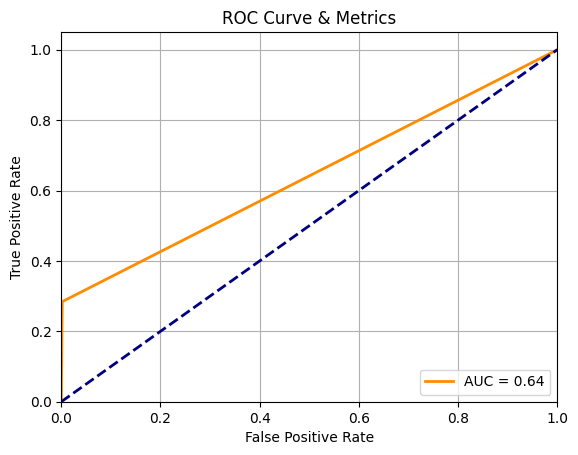

Accuracy    : 0.9662
Precision   : 0.6351
Recall      : 0.3061
Specificity : 0.9929
F1_score    : 0.4132
Auc         : 0.6495


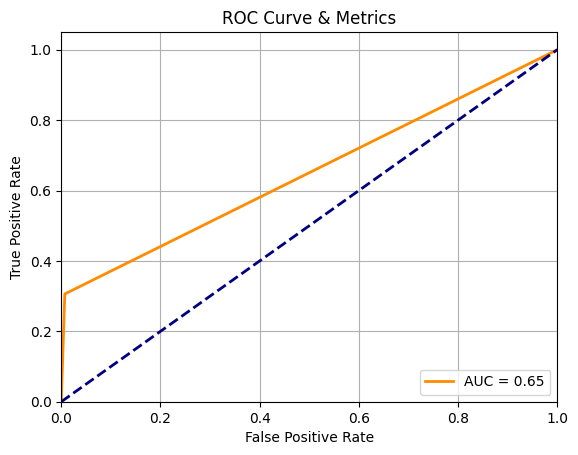

Accuracy    : 0.9722
Precision   : 0.7319
Recall      : 0.1728
Specificity : 0.998
F1_score    : 0.2795
Auc         : 0.5854


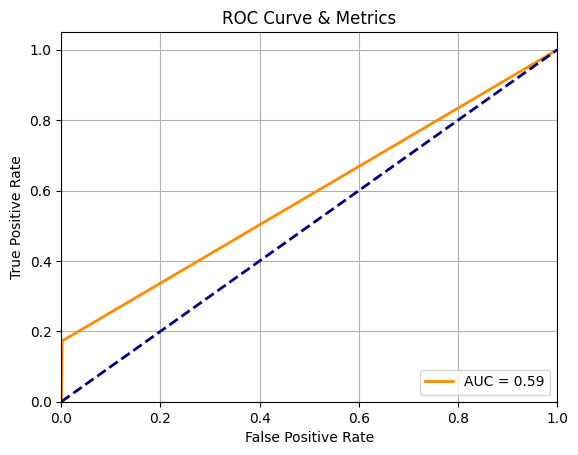

In [22]:
plot_roc_and_get_metrics(y_transaction_train_df, preds_train, threshold=0.5)
plot_roc_and_get_metrics(y_transaction_val_df, preds_val, threshold=0.5)
metrics_for_test_set = plot_roc_and_get_metrics(y_transaction_test_df, preds_test, threshold=0.5)

# Save On MLflow

In [23]:
import dagshub
dagshub.init(repo_owner='nmach22', repo_name='Fraud-Detection-ml', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=334b122a-9105-4b07-a442-b0d6cd3cacc0&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=1c25c1006fad2c32d96d581d9cb821c5b03f5c41d8ed365c3d0fba6c53511569




Output()

Accessing as nmach22

Initialized MLflow to track repo "nmach22/Fraud-Detection-ml"

Repository nmach22/Fraud-Detection-ml initialized!

In [24]:
nm = type(model).__name__
print(nm)
nm.capitalize()
print(nm)

LogisticRegression
LogisticRegression


Accuracy    : 0.9722
Precision   : 0.7319
Recall      : 0.1728
Specificity : 0.998
F1_score    : 0.2795
Auc         : 0.5854


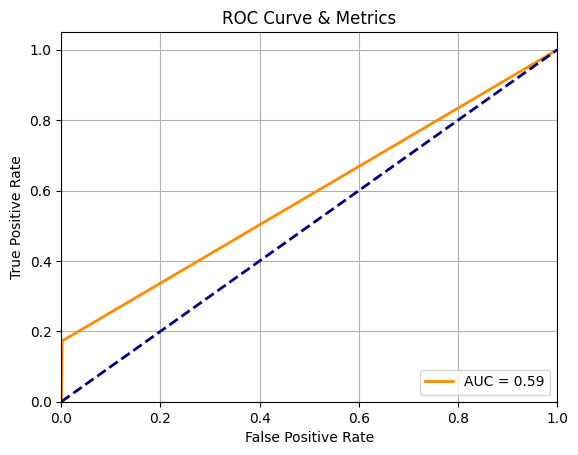

2025/04/24 13:03:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run fill nans with 0, woe encoding, no additional changes (identity.csv not used) at: https://dagshub.com/nmach22/Fraud-Detection-ml.mlflow/#/experiments/0/runs/7d17ecf36b114b91b05690ef91971023
🧪 View experiment at: https://dagshub.com/nmach22/Fraud-Detection-ml.mlflow/#/experiments/0


In [35]:
import mlflow

model_name = type(model).__name__

experiment_name = model_name + '_Pipeline'
run_name = 'fill nans with 0, woe encoding, no additional changes (identity.csv not used)'

roc_plot_path = "roc_curve.png"
metrics_for_test_set = plot_roc_and_get_metrics(
    y_transaction_test_df, 
    preds_test, 
    threshold=0.5, 
    save_path=roc_plot_path
)

mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name=run_name):
    # Log parameters
    mlflow.log_param("fillna_numerical_value", 0)
    mlflow.log_param("removed columns", columns_to_delete)
    mlflow.log_param("model_name", model_name)

    # Log metrics
    for metric_name, metric_value in metrics_for_test_set.items():
        mlflow.log_metric(metric_name.capitalize(), metric_value)

    # Log model
    mlflow.sklearn.log_model(pipeline, artifact_path="pipeline")

    # Log ROC plot as artifact
    mlflow.log_artifact(roc_plot_path)

# Generate Submission file

In [28]:
test_transaction_df = pd.read_csv('/kaggle/input/ieee-fraud-detection/test_transaction.csv')

In [29]:
preds_test_subm = pipeline.predict(test_transaction_df)

In [30]:
len(preds_test_subm)

506691

In [31]:
submission = pd.DataFrame({
    'TransactionID': test_transaction_df['TransactionID'],
    'isFraud': preds_test_subm
})

# Save to CSV
submission.to_csv('Submission_Logistic_regression_first_attempt).csv', index=False)

In [32]:
submission['isFraud'].sum()

10425

## Submission Fraud/Not Fraud distribution

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_class_distribution(y, title="Class Distribution"):
    counts = y.value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=counts.index, y=counts.values, palette="viridis")
    plt.title(title)
    plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
    plt.ylabel("Number of Samples")
    plt.xlabel("Class")
    for i, count in enumerate(counts.values):
        plt.text(i, count + 100, f'{count:,}', ha='center')
    plt.tight_layout()
    plt.show()

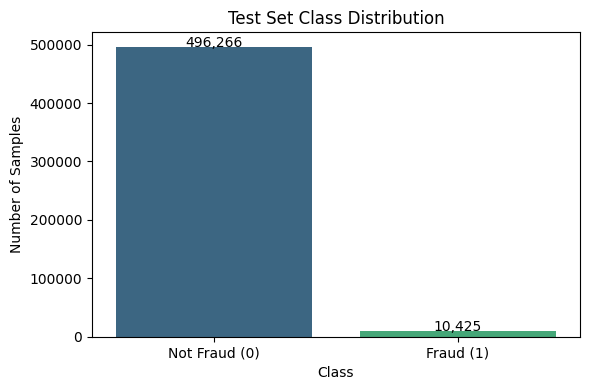

In [34]:
plot_class_distribution(submission['isFraud'], "Test Set Class Distribution")

# Imbalanced Learn

In [ ]:
# !pip install --upgrade scikit-learn==1.3.2 imbalanced-learn==0.11.0

In [ ]:
# from imblearn.pipeline import Pipeline as ImbPipeline
# from imblearn.under_sampling import RandomUnderSampler
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(random_state=42)

# # Imbalanced-learn pipeline
# imb_pipeline = ImbPipeline(steps=[
#     ('undersampler', RandomUnderSampler(random_state=42, sampling_strategy=0.2)),  # Undersampling step
    
#     ('classifier', model),
# ])

# # Then use it as you would use a regular sklearn pipeline
# imb_pipeline.fit(X_transaction_train_df, y_transaction_train_df)
# predictions_val = imb_pipeline.predict(X_transaction_val_df)